In [224]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import time
import zipfile
import locale

pd.set_option("display.max_columns", 50)
locale.setlocale( locale.LC_ALL, '' )

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [ ]:
# debugging 

# import pdb; pdb.set_trace()
# c means continue
# n means n
# can type in variable names

In [184]:
# checking structure of land value data
zip_path = Path("data/land_value_data/LV_20170701.zip")
zf = zipfile.ZipFile(zip_path)
start_time = time.time()

test_df = pd.read_csv(zf.open("001_LAND_VALUE_DATA_20170701.csv"), dtype=dtype_dict)

elapsed_time = time.time() - start_time
print(elapsed_time)

test_df.sample(3)

0.22034430503845215


,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,PROPERTY DESCRIPTION,ZONE CODE,AREA,AREA TYPE,BASE DATE 1,LAND VALUE 1,AUTHORITY 1,BASIS 1,BASE DATE 2,LAND VALUE 2,AUTHORITY 2,BASIS 2,BASE DATE 3,LAND VALUE 3,AUTHORITY 3,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
3239,1,CESSNOCK,142,NORMAL,NaN,NaN,67A,ABERDARE RD,ABERDARE,2325.0,"1, 2, 3, 4/43/758002",R2,4046.80,M,01/07/2016,428000.0,14A(1),6A(1),01/07/2015,391000.0,14A(1),6A(1),01/07/2014,380000.0,14A(1),6A(1),01/07/2013,380000.0,14A(1),6A(1),01/07/2012,439000.0,14A(1),6A(1),NaN
8930,1,CESSNOCK,1667,NORMAL,NaN,NaN,103,RAWSON ST,ABERDARE,2325.0,3/36/758002,R2,1011.83,M,01/07/2016,134000.0,14A(1),6A(1),01/07/2015,134000.0,14A(1),6A(1),01/07/2014,127000.0,14A(1),6A(1),01/07/2013,125000.0,14A(1),6A(1),01/07/2012,121000.0,14A(1),6A(1),NaN
22538,1,CESSNOCK,3709988,NORMAL,NaN,NaN,66,ARMIDALE ST,ABERMAIN,2326.0,102/1186679,R2,483.70,M,01/07/2016,110000.0,14A(1),6A(1),01/07/2015,105000.0,14A(1),6A(1),01/07/2014,105000.0,14A(1),6A(1),01/07/2013,97000.0,14A(1),6A(1),01/07/2012,93000.0,27B,6A(1),NaN


In [206]:
# aggregating land value csv files

def read_csv_and_add_column(csv):
    df = pd.read_csv(zf.open(csv), 
                     encoding="ISO-8859-1", 
                     error_bad_lines=False,
                     dtype=dtype_dict)
    df["SOURCE CSV FILENAME"] = csv
    return df


def get_namelist_csv_only(zf):
    zf_list = zf.namelist()
    csv_list = [k for k in zf_list if ".csv" in k]
    return csv_list


zip_path_list = sorted(Path("data/land_value_data").glob("**/*.zip"))
land_value_csv_list = sorted(Path("data/land_value_data").glob("**/*.csv"))

# loop through all zips, if zip isn't processed then process it
for zip_path in zip_path_list:
    if zip_path
    start_time = time.time()
    
    zf = zipfile.ZipFile(zip_path)
     
    zf_df = pd.concat([read_csv_and_add_column(csv) for csv in get_namelist_csv_only(zf)], sort=False)
    zf.close()

    zf_df["SOURCE ZIP FILENAME"] = csv

    zf_df.to_csv(Path("data/land_value_data/{}_combined.csv".format(zip_path.stem)), compression="zip")

    elapsed_time = time.time() - start_time
    print(zip_path.stem + " - " + str(elapsed_time))

LV_20190701 - 69.5326406955719


In [232]:
### MARSDEN PARK ###


df1 = pd.read_csv(land_value_csv_list[0], compression="zip", dtype=dtype_dict)
df2 = pd.read_csv(land_value_csv_list[12], compression="zip", dtype=dtype_dict)
df3 = pd.read_csv(land_value_csv_list[24], compression="zip", dtype=dtype_dict)

def get_min_max_of_land_value_df(df):
    min_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].min(), grouping=True)
    max_land_value = locale.currency(df["LAND VALUE 1"][(df["SUBURB NAME"] == "MARSDEN PARK")].max(), grouping=True)
    return [min_land_value, max_land_value]

print([get_min_max_of_land_value_df(df1),
       get_min_max_of_land_value_df(df2),
       get_min_max_of_land_value_df(df3)])

[['$1,130.00', '$78,000,000.00'], ['$1,210.00', '$185,000,000.00'], ['$720.00', '$224,000,000.00']]


In [120]:
land_value_df["LAND VALUE 1"][(land_value_df["SUBURB NAME"] == "MARSDEN PARK")].sum()

8960837810

In [47]:
# getting crime data
crime_suburb_data_filepath = Path("data/SuburbData2018.csv")
crime_suburb_data = pd.read_csv(crime_suburb_data_filepath)

In [6]:
# sampling data
# crime_suburb_data.sample(10)

In [48]:
# types of offences
unique_offence_categories = crime_suburb_data["Offence category"].unique()
# pd.Series(unique_offence_categories)

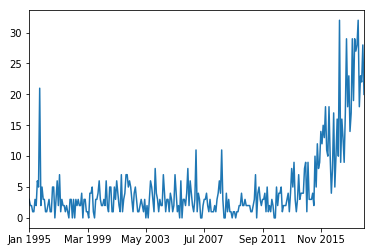

In [65]:
# filter suburb and offence category then plot
marsdenpark_data = crime_suburb_data[:][(crime_suburb_data["Suburb"] == "Marsden Park") &
                                        (crime_suburb_data["Offence category"] == "Theft")]
total_crimes_timeseries = marsdenpark_data.drop(["Suburb", "Offence category", "Subcategory"],axis = 1).sum()
total_crimes_timeseries.plot()